# Differential expression analysis


##### You have now successfully run the pipeline and checked the first quality control metrics of your fastq files. However, this is only primary analysis.

##### We would now like to understand exactly the difference between our groups of mice. 

##### Which pipeline would you use for this?

I would use the **differentialabundance** pipeline.<br>
Therefre, we first create a <font color="#008080">samplesheet</font> and a <font color="#FF0000">contrasts file</font>.<br><br>


##### <font color="#008080">Samplesheet</font>

In [ ]:
import pandas as pd

In [76]:
# Create a DataFrame with sample and condition columns
data = {
    'sample': ['Sham_oxy_1','Sham_oxy_2','Sham_oxy_3','Sham_oxy_4',
               'Sham_Sal_1','Sham_Sal_2','Sham_Sal_3','Sham_Sal_4',
               'SNI_oxy_1','SNI_oxy_2','SNI_oxy_3','SNI_oxy_4',
               'SNI_Sal_1','SNI_Sal_2','SNI_Sal_3','SNI_Sal_4'],
    'condition': ['treated_Sham','treated_Sham','treated_Sham','treated_Sham',
                  'control_Sham','control_Sham','control_Sham','control_Sham',
                  'treated_SNI','treated_SNI','treated_SNI','treated_SNI',
                  'control_SNI','control_SNI','control_SNI','control_SNI'] 
}

# Create the samplesheet DataFrame
samplesheet_df = pd.DataFrame(data)

# Display the DataFrame
print(samplesheet_df)

# Save the samplesheet DataFrame to a CSV file
samplesheet_df.to_csv('samplesheet.csv', index=False)

        sample     condition
0   Sham_oxy_1  treated_Sham
1   Sham_oxy_2  treated_Sham
2   Sham_oxy_3  treated_Sham
3   Sham_oxy_4  treated_Sham
4   Sham_Sal_1  control_Sham
5   Sham_Sal_2  control_Sham
6   Sham_Sal_3  control_Sham
7   Sham_Sal_4  control_Sham
8    SNI_oxy_1   treated_SNI
9    SNI_oxy_2   treated_SNI
10   SNI_oxy_3   treated_SNI
11   SNI_oxy_4   treated_SNI
12   SNI_Sal_1   control_SNI
13   SNI_Sal_2   control_SNI
14   SNI_Sal_3   control_SNI
15   SNI_Sal_4   control_SNI


##### <font color="#FF0000">Contrasts file</font>

In [6]:
import pandas as pd
# Create a DataFrame with id, variable, reference and target columns
data = {
    'id': ['SNI_oxy_Sham_Sal', 'Sham_oxy_Sham_Sal', 'Sham_Sal_SNI_Sal','SNI_oxy_SNI_Sal'] ,
    'variable': ['condition','condition', 'condition','condition'],
    'reference': ['control_Sham', 'control_Sham', 'control_Sham','control_SNI'],
    'target': ['treated_SNI', 'treated_Sham','control_SNI','treated_SNI']
}

# Create the contrasts DataFrame
contrasts_df = pd.DataFrame(data)

# Display the DataFrame
print(contrasts_df)

# Save the contrasts DataFrame to a CSV file
contrasts_df.to_csv('contrasts.csv', index=False)


                  id   variable     reference        target
0   SNI_oxy_Sham_Sal  condition  control_Sham   treated_SNI
1  Sham_oxy_Sham_Sal  condition  control_Sham  treated_Sham
2   Sham_Sal_SNI_Sal  condition  control_Sham   control_SNI
3    SNI_oxy_SNI_Sal  condition   control_SNI   treated_SNI


In [7]:
 !NXF_VER=23.10.1 nextflow run nf-core/differentialabundance --input samplesheet.csv --contrasts contrasts.csv --matrix salmon.merged.gene_counts.tsv --outdir results -profile docker -r 1.5.0

Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.1
Launching `https://github.com/nf-core/differentialabundance` [deadly_mahavira] DSL2 - revision: 3dd360fed0 [1.5.0]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : deadly_mahavira
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd7

<br><br>
##### Explain all the parameters you set and why you set them in this way.


- *input*: This paramter specifies the path to the samplesheet (.csv file) containing information on the samples (sample names and conditions) that are processed. 

- *contrasts:* This parameter specifies the path to the contrast (.csv file) containing information on the comparison groups for differential abundance analysis. <br>
As the paper suggest, we have a look at 4 different comparisons. Each row represent one specific comparison. The groups we want to compare are defined in the reference (control group) and target columns.
As we use the 'condition' column from the samplesheet we set the column called 'variable' for both comparisons to 'condition'.

- matrix: This parameter specifies the path to the gene count matrix, which is the output from Salmon 

- *genome*: Specifies the reference genome to use for alignment and analysis -> see sheet 2 

- *outdir*: Specifies the output directory where the results of the analysis will be saved


**Sources:**<br>
Ewels, P., Magnusson, M., Lundin, S., & Kaller, M. (2020). nf-core: a collection of community-driven bioinformatics pipelines. *Nature Methods*, 17(1), 24-25. https://doi.org/10.5281/zenodo.7568000.

<br><br>

##### How did the pipeline perform?

All tasks in the workflow were completed without errors and the run time of the workflow (10 minutes and 1 second) was relatively low.<br>
The workflow utilized 0.2 CPU hours during execution, indicating that the tasks were not particularly CPU-intensive.<br> The percentage of single-core CPU usage remained below 200% for all processes, except for the *MAKE_REPORT_BUNDLE* process.<br>
Additionally, physical memory usage was consistently below 1.5 GB for all processes, with the exception of the *RMARKDOWNNOTEBOOK* process, which stood out at 3.481 GB.<br>
Considering all the statistics, we can conclude that the pipeline performed quite good.
<br><br>

##### Would you exclude any samples? If yes, which and why?

The Principal components analysis is helpful in revealing samples that have abnormal variation patterns.<br>
In our experiment the samples *SNI_Sal_2* and *SNI_Sal_4* stand out.<br>
This assumtion is also supported by the density plot which illustrates the distribution of gene expression levels. One can see that the distribution for the *SNI_Sal_2* and *SNI_Sal_4* samples differ from the rest.<br>
This might indicate abnormal expression levels.<br>
One might think that exclusion of these 2 samples is a good idea. <br>
However, this also means that we lose replicates and our experiment is heavily influenced by random biological variation or experimental biases. That's why I would suggest to keep all off the samples in experiments with small number of replicates. 
<br><br>

#####  How many genes were differentially expressed in each contrast? 

In [8]:
# numbers are taken from the report 
#create DataFrame 
data = {
    'Comparison': [
        'SNI_oxy versus Sham_Sal',
        'Sham_oxy versus Sham_Sal',
        'SNI_Sal versus Sham_Sal'
    ],
    'Upregulated': [1, 8,72],
    'Downregulated': [1, 0, 1]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                 Comparison  Upregulated  Downregulated
0   SNI_oxy versus Sham_Sal            1              1
1  Sham_oxy versus Sham_Sal            8              0
2   SNI_Sal versus Sham_Sal           72              1


<br><br>
##### Does this confirm what the paper mentions?


No, in the paper many more genes were found that are differently expressed.<br>
Further, in the paper most  DEGs were found in the comparison of the Sham-oxy vs. Sham-Sal which differs from our outcome.<br>
Further, the paper distinguishes between different brain regions. <br><br>
Sham-Oxy vs. Sham-Sal:<br>
- NAc: 2,609 genes 
- mPFC: 1,449 genes
- VTA: 584 genes <br><br>

SNI-Oxy vs. Sham-Sal:<br>
- NAc: 1,012 genes
- mPFC: 1,116 genes
- VTA: 533 genes

SNI-Sal vs. Sham-Sal:<br>
- NAc: 1,457 genes
- mPFC: 1,052 genes
- VTA: 425 genes

<br><br>

##### The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

The **nucleus accumbens (NAc)** is a brain region known for mediating various behaviors, including reward processing and the experience of satisfaction. <br>
Additionally, it plays a significant role in depression and drug addiction, as alterations in its function can influence mood regulation and addictive behaviors (Salgado, 2015).<br><br>
The **mPFC (Medial prefrontal cortex)** integrates information from various brain regions and is crucial for cognitive processes, emotion regulation, motivation, and social behavior.<br>
Dysfunction in the mPFC is associated with numerous neurological and psychiatric disorders, including depression, anxiety, and addiction *(Xu, 2019)*. <br><br>
"The **VTA (ventral tegmental area)** is well known for regulating reward consumption, learning, memory, and addiction behaviors through mediating dopamine (DA) release in downstream regions." *(Cai, 2022)*


**Sources:**<br>
Salgado S, Kaplitt MG. The Nucleus Accumbens: A Comprehensive Review. Stereotact Funct Neurosurg. 2015;93(2):75-93. doi: 10.1159/000368279. Epub 2015 Feb 18. PMID: 25720819.<br>
Xu P, Chen A, Li Y, Xing X, Lu H. Medial prefrontal cortex in neurological diseases. Physiol Genomics. 2019 Sep 1;51(9):432-442. doi: 10.1152/physiolgenomics.00006.2019. Epub 2019 Aug 2. PMID: 31373533; PMCID: PMC6766703.<br>
Cai J, Tong Q. Anatomy and Function of Ventral Tegmental Area Glutamate Neurons. Front Neural Circuits. 2022 May 20;16:867053. doi: 10.3389/fncir.2022.867053. PMID: 35669454; PMCID: PMC9164627.

<br><br>

##### Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

Gene Ontology (GO) analysis for enriched biological processes and ingenuity pathway analysis (IPA) were performed to better understand the molecular signature of DEGs affected by oxycodone withdrawal under both conditions.<br>

**Figure 4** shows the results of GO analysis.<br>
It shows that FEV, SETDB1, SIRT3 as well as BDNF are included in the **NAc** brain region.<br>
In the **mPFC**, glutamate reception (SHANK1) was a top hit in the GO analysis. Addtionally, ADCYAP1, HTT, MAPK3, CREB1 and MEF2D were mentioned. <br>
In the **VTA** ADH1, LRG1, SOCS1, CGAS, RELA, STAT3 and ELK3 seems to be included in this brain region.<br><br>

IPA analysis shows that conserved pathways across these brain regions included CREB signaling in neurons, G-protein-coupled receptor signaling, circadian rhythm signaling and osteoarthritis pathways.<br>
The brain region and the DEGs underlaying this pathways are listed in **Table 1**.


##### Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

No, it won't be sufficient as biologists also need information on the context of the study.
In order to draw conclusion and use the results for further analysis, biologists need to know the pathways in which these genes are involved and to which diseases they are related to.<br>
Further, we need know the significance of the expression level of individual genes. Some genes show higher gene expression changes between conditions compared to other genes.<br>
It is also important to differentiate between conditiions and genotypes. It is not sufficient to provide only a list of DEG. We rather need different lists for different genotypes and conditions.<br>
Lastly, what is also helpful fo biologists is to include the genes function and which conclusion we can draw from causal relationsips between DEGs.<br>

The paper does not mention wheather genes are up-/downregulated. However, the paper distinguishes between conditions and genotypes. 

<br><br>

##### Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

In [1]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('DEGs.xlsx', header=0)
print(df)

# Count duplicates between specified columns, ensuring values are not present in other columns and are not NaN.

# Count duplicates in 'SNI_oxy_Sham_Sal' that are in 'Sham_oxy_Sham_Sal', and not in 'SNI_Sal_Sham_Sal'
duplicates_SNI_oxy_Sham_Sal_Sham_oxy_Sham_Sal = df[
    df['SNI_oxy_Sham_Sal'].isin(df['Sham_oxy_Sham_Sal']) & 
    ~df['SNI_oxy_Sham_Sal'].isin(df['SNI_Sal_Sham_Sal']) & 
    df['SNI_oxy_Sham_Sal'].notna() & 
    df['Sham_oxy_Sham_Sal'].notna()
].shape[0]

# Count duplicates in 'SNI_oxy_Sham_Sal' that are in 'SNI_Sal_Sham_Sal', and not in 'Sham_oxy_Sham_Sal'
duplicates_SNI_oxy_Sham_Sal_SNI_Sal_Sham_Sal = df[
    df['SNI_oxy_Sham_Sal'].isin(df['SNI_Sal_Sham_Sal']) &
    ~df['SNI_oxy_Sham_Sal'].isin(df['Sham_oxy_Sham_Sal']) &
    df['SNI_oxy_Sham_Sal'].notna() & 
    df['SNI_Sal_Sham_Sal'].notna()
].shape[0]

# Count duplicates in 'Sham_oxy_Sham_Sal' that are in 'SNI_Sal_Sham_Sal',  and not in 'SNI_oxy_Sham_Sal'
duplicates_Sham_oxy_Sham_Sal_SNI_Sal_Sham_Sal = df[
    df['Sham_oxy_Sham_Sal'].isin(df['SNI_Sal_Sham_Sal']) &
    ~df['SNI_oxy_Sham_Sal'].isin(df['SNI_Sal_Sham_Sal']) &
    ~df['SNI_oxy_Sham_Sal'].isin(df['Sham_oxy_Sham_Sal']) &
    df['Sham_oxy_Sham_Sal'].notna() & 
    df['SNI_Sal_Sham_Sal'].notna()
].shape[0]

# Count intersections among all three columns, ensuring values are not NaN
intersection = df[
    df['Sham_oxy_Sham_Sal'].isin(df['SNI_Sal_Sham_Sal']) &
    df['SNI_Sal_Sham_Sal'].isin(df['Sham_oxy_Sham_Sal']) &
    df['Sham_oxy_Sham_Sal'].notna() & 
    df['SNI_Sal_Sham_Sal'].notna()
].shape[0]

# Display counts of duplicates found between specified columns
print("Duplicates found between 'SNI_oxy_Sham_Sal' and 'Sham_oxy_Sham_Sal':", duplicates_SNI_oxy_Sham_Sal_Sham_oxy_Sham_Sal)
print("Duplicates found between 'SNI_oxy_Sham_Sal' and 'SNI_Sal_Sham_Sal':", duplicates_SNI_oxy_Sham_Sal_SNI_Sal_Sham_Sal)
print("Duplicates found between 'Sham_oxy_Sham_Sal' and 'SNI_Sal_Sham_Sal':", duplicates_Sham_oxy_Sham_Sal_SNI_Sal_Sham_Sal)
print("Duplicates found among 'SNI_oxy_Sham_Sal', 'Sham_oxy_Sham_Sal' and 'SNI_Sal_Sham_Sal':", intersection)


   SNI_oxy_Sham_Sal Sham_oxy_Sham_Sal SNI_Sal_Sham_Sal
0              Cdr1            Slc6a3           Ptger1
1           Gm22614           Adcyap1          Adcyap1
2               NaN           Khdrbs2          Slc30a3
3               NaN               Ret              Cck
4               NaN             Cdh12           Itgbl1
..              ...               ...              ...
68              NaN               NaN    RP23-151F20.5
69              NaN               NaN           Rsph4a
70              NaN               NaN    RP23-371A16.3
71              NaN               NaN        Rn18s-rs5
72              NaN               NaN    RP24-481I21.3

[73 rows x 3 columns]
Duplicates found between 'SNI_oxy_Sham_Sal' and 'Sham_oxy_Sham_Sal': 0
Duplicates found between 'SNI_oxy_Sham_Sal' and 'SNI_Sal_Sham_Sal': 0
Duplicates found between 'Sham_oxy_Sham_Sal' and 'SNI_Sal_Sham_Sal': 1
Duplicates found among 'SNI_oxy_Sham_Sal', 'Sham_oxy_Sham_Sal' and 'SNI_Sal_Sham_Sal': 1


Number of non-NaN entries in each column:
SNI_oxy_Sham_Sal      2
Sham_oxy_Sham_Sal     8
SNI_Sal_Sham_Sal     73
dtype: int64


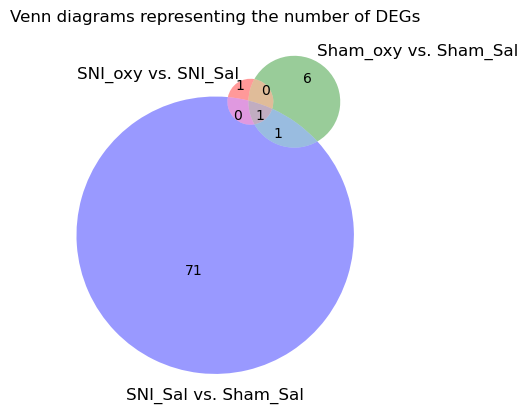

In [12]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Count the number of non-NaN entries in each column
non_nan_counts = df.count()
print("Number of non-NaN entries in each column:")
print(non_nan_counts)

# Create the Venn diagram for three comparisons of upregulated genes
venn3(
    subsets=(
        non_nan_counts['SNI_oxy_Sham_Sal'] - duplicates_SNI_oxy_Sham_Sal_Sham_oxy_Sham_Sal - duplicates_SNI_oxy_Sham_Sal_SNI_Sal_Sham_Sal - intersection ,  # Count of non-NaN entries in SNI_oxy_SNI_Sal
        non_nan_counts['Sham_oxy_Sham_Sal'] - duplicates_SNI_oxy_Sham_Sal_Sham_oxy_Sham_Sal - duplicates_Sham_oxy_Sham_Sal_SNI_Sal_Sham_Sal- intersection , # Count of non-NaN entries in Sham_oxy_Sham_Sal
        duplicates_SNI_oxy_Sham_Sal_Sham_oxy_Sham_Sal,  # Duplicates found between SNI_oxy_SNI_Sal and Sham_oxy_Sham_Sal
        non_nan_counts['SNI_Sal_Sham_Sal'] - duplicates_SNI_oxy_Sham_Sal_SNI_Sal_Sham_Sal - duplicates_Sham_oxy_Sham_Sal_SNI_Sal_Sham_Sal - intersection ,  # Count of non-NaN entries in SNI_Sal_Sham_Sal
        duplicates_SNI_oxy_Sham_Sal_SNI_Sal_Sham_Sal,  # Duplicates found between SNI_oxy_SNI_Sal and SNI_Sal_Sham_Sal
        duplicates_Sham_oxy_Sham_Sal_SNI_Sal_Sham_Sal,  # Duplicates found between Sham_oxy_Sham_Sal and SNI_Sal_Sham_Sal
        intersection  # Intersection of all three comparisons
    ),
    set_labels=(
        'SNI_oxy vs. SNI_Sal', 
        'Sham_oxy vs. Sham_Sal', 
        'SNI_Sal vs. Sham_Sal'
    )
)

# Set the title for the Venn diagram
plt.title("Venn diagrams representing the number of DEGs") 
plt.show()
